In [2]:
require(tidyverse)

### Numeric Distributions


In [1]:
scores <- c(43, 71, 90, 12, 44, 89, 64, 48, 91, 72, 57, 52, 51, 64, 88, 97, 92, 91, 95)

In [6]:
scores |> length()

[1] 19

In [12]:
scores[order(scores)]

 [1] 12 43 44 48 51 52 57 64 64 71 72 88 89 90 91 91 92 95 97

In [ ]:
### Quantiles

#2 parts split = Halves (H1) number of splits = number of splits - 1 split point
#3 part split = Thirds or Tertiles (T1, T2)
#4 part split = Quarters or Quartiles (Q1, Q2, Q3)
#5 part split = Quintiles or Pentiles
#10 part split = Deciles
#100 part split = Percentiles

In [14]:
scores |> quantile(0.5)

50% 
 71 

In [16]:
scores |> quantile(c(0.33, 0.66))

  33%   66% 
56.70 88.88 

### Imports

In [3]:
#install.packages("readxl")
require(readxl)

Loading required package: readxl


Warning message:
package ‘readxl’ was built under R version 4.3.3 


In [19]:
store <- read_excel("data/SuperStore.xlsx")

### Queries

In [ ]:
#1. install.packages("duckdb")

In [5]:
#import required package3s
require(DBI)
require(duckdb)

In [6]:
#2. create a connection
conn <- dbConnect(duckdb())

In [7]:
#3. write a query
dbGetQuery(conn, "SELECT * FROM 'data/male_players.csv' LIMIT 10") |> tibble()

# A tibble: 10 × 109
   player_id player_url    fifa_version fifa_update update_as_of short_name long_name player_positions overall potential
       <dbl> <chr>                <dbl>       <dbl> <date>       <chr>      <chr>     <chr>              <dbl>     <dbl>
 1    231747 /player/2317…           24           2 2023-09-22   K. Mbappé  Kylian M… ST, LW                91        94
 2    239085 /player/2390…           24           2 2023-09-22   E. Haaland Erling B… ST                    91        94
 3    192985 /player/1929…           24           2 2023-09-22   K. De Bru… Kevin De… CM, CAM               91        91
 4    158023 /player/1580…           24           2 2023-09-22   L. Messi   Lionel A… CF, CAM               90        90
 5    165153 /player/1651…           24           2 2023-09-22   K. Benzema Karim Be… CF, ST                90        90
 6    188545 /player/1885…           24           2 2023-09-22   R. Lewand… Robert L… ST                    90        90
 7    19211

In [8]:
players <- read_csv("data/male_players.csv")

Rows: 180021 Columns: 109
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (43): player_url, short_name, long_name, player_positions, club_name, league_name, club_position, club_loaned_f...
dbl  (63): player_id, fifa_version, fifa_update, overall, potential, value_eur, wage_eur, age, height_cm, weight_kg,...
date  (3): update_as_of, dob, club_joined_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
players

# A tibble: 180,021 × 109
   player_id player_url    fifa_version fifa_update update_as_of short_name long_name player_positions overall potential
       <dbl> <chr>                <dbl>       <dbl> <date>       <chr>      <chr>     <chr>              <dbl>     <dbl>
 1    231747 /player/2317…           24           2 2023-09-22   K. Mbappé  Kylian M… ST, LW                91        94
 2    239085 /player/2390…           24           2 2023-09-22   E. Haaland Erling B… ST                    91        94
 3    192985 /player/1929…           24           2 2023-09-22   K. De Bru… Kevin De… CM, CAM               91        91
 4    158023 /player/1580…           24           2 2023-09-22   L. Messi   Lionel A… CF, CAM               90        90
 5    165153 /player/1651…           24           2 2023-09-22   K. Benzema Karim Be… CF, ST                90        90
 6    188545 /player/1885…           24           2 2023-09-22   R. Lewand… Robert L… ST                    90        90
 7    

In [10]:
#3. alternative - register dataframe as duckdb table
duckdb_register(conn, "fifa", players)

In [11]:
dbGetQuery(conn, "SELECT * FROM fifa LIMIT 10") |> tibble()

# A tibble: 10 × 109
   player_id player_url    fifa_version fifa_update update_as_of short_name long_name player_positions overall potential
       <dbl> <chr>                <dbl>       <dbl> <date>       <chr>      <chr>     <chr>              <dbl>     <dbl>
 1    231747 /player/2317…           24           2 2023-09-22   K. Mbappé  Kylian M… ST, LW                91        94
 2    239085 /player/2390…           24           2 2023-09-22   E. Haaland Erling B… ST                    91        94
 3    192985 /player/1929…           24           2 2023-09-22   K. De Bru… Kevin De… CM, CAM               91        91
 4    158023 /player/1580…           24           2 2023-09-22   L. Messi   Lionel A… CF, CAM               90        90
 5    165153 /player/1651…           24           2 2023-09-22   K. Benzema Karim Be… CF, ST                90        90
 6    188545 /player/1885…           24           2 2023-09-22   R. Lewand… Robert L… ST                    90        90
 7    19211

In [41]:
#Select, alias
dbGetQuery(conn, "
SELECT 
  short_name AS player, overall AS ability, potential, age, league_name AS league, nationality_name
FROM fifa 
--WHERE nationality_name = 'Canada'
--WHERE age > 30
WHERE age BETWEEN 25 AND 30 
ORDER BY player
LIMIT 20
")

          player ability potential age       league nationality_name
1          A Lan      76        76  28 Super League           Brazil
2          A Lan      78        78  29 Super League           Brazil
3          A Lan      77        77  30 Super League         China PR
4       A. Abbas      58        58  30   Pro League     Saudi Arabia
5       A. Abbas      64        64  30     A-League             Iraq
6       A. Abbas      62        62  28     A-League             Iraq
7       A. Abbas      63        63  27     A-League             Iraq
8       A. Abbas      66        66  29   K League 1             Iraq
9    A. Abdallah      66        69  25      Ligue 2          Comoros
10 A. Abdellaoui      60        63  26 Super League          Algeria
11 A. Abdellaoui      63        64  27 Super League          Algeria
12 A. Abdellaoui      62        62  28   Pro League          Algeria
13 A. Abdellaoui      59        64  25 Super League          Algeria
14  A. Abdennour      80        82

In [43]:
#alias with old name = new name
players |> 
    filter(age |> between(25, 30)) |>
    select(player=short_name, ability=overall, potential, age, league=league_name, nationality_name) |> 
    arrange(player) |> #order by
    #filter(nationality_name == 'Canada') |> 
    #filter(age > 30) |> 
    head(20) #limit

# A tibble: 20 × 6
   player        ability potential   age league       nationality_name
   <chr>           <dbl>     <dbl> <dbl> <chr>        <chr>           
 1 A Lan              77        77    30 Super League China PR        
 2 A Lan              78        78    29 Super League Brazil          
 3 A Lan              76        76    28 Super League Brazil          
 4 A. Abbas           64        64    30 A-League     Iraq            
 5 A. Abbas           66        66    29 K League 1   Iraq            
 6 A. Abbas           62        62    28 A-League     Iraq            
 7 A. Abbas           58        58    30 Pro League   Saudi Arabia    
 8 A. Abbas           63        63    27 A-League     Iraq            
 9 A. Abdallah        66        69    25 Ligue 2      Comoros         
10 A. Abdellaoui      62        62    28 Pro League   Algeria         
11 A. Abdellaoui      63        64    27 Super League Algeria         
12 A. Abdellaoui      60        63    26 Super League Alge

In [47]:
# Aggregation
dbGetQuery(conn, "
SELECT 
  COUNT(DISTINCT nationality_name)
FROM fifa
")

  count(DISTINCT nationality_name)
1                              188

In [ ]:
players |> nrow() # same as select count(*) from table

[1] 180021

In [48]:
players |> with(nationality_name) |> n_distinct()

[1] 188

In [52]:
players |> with(nationality_name) |> unique() |> length()

[1] 188

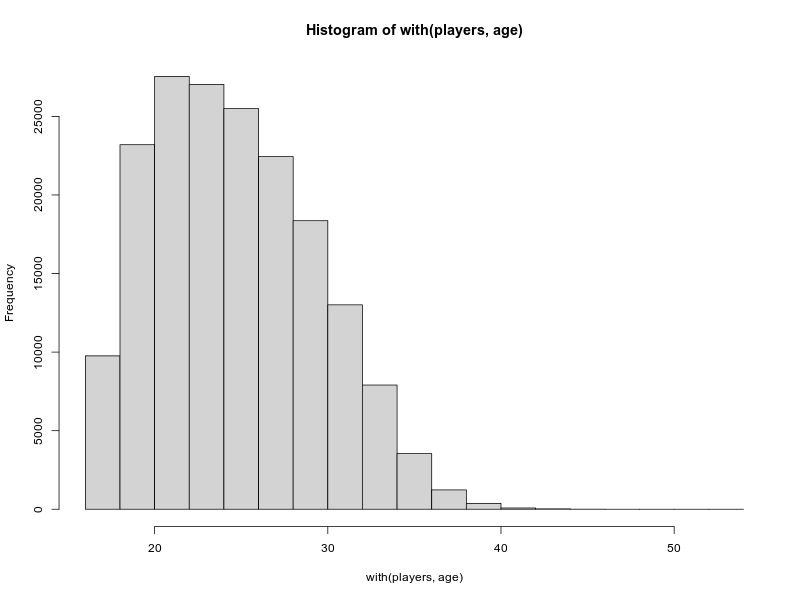

In [53]:
players |> with(age) |> hist()

In [61]:
players |> select(age, overall, potential) |> summary()

      age           overall        potential    
 Min.   :16.00   Min.   :40.00   Min.   :40.00  
 1st Qu.:21.00   1st Qu.:61.00   1st Qu.:66.00  
 Median :25.00   Median :66.00   Median :71.00  
 Mean   :25.14   Mean   :65.71   Mean   :70.78  
 3rd Qu.:28.00   3rd Qu.:70.00   3rd Qu.:75.00  
 Max.   :54.00   Max.   :94.00   Max.   :95.00  

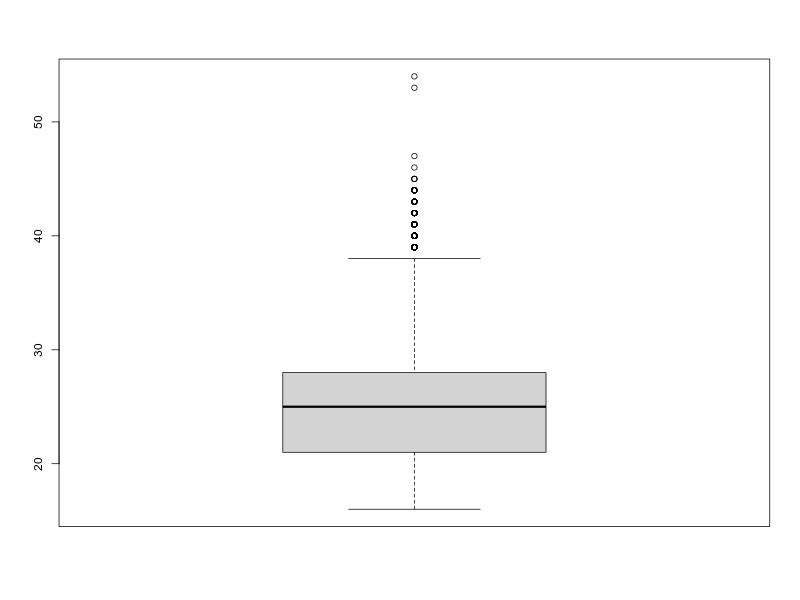

In [66]:
players |> select(age) |> boxplot()

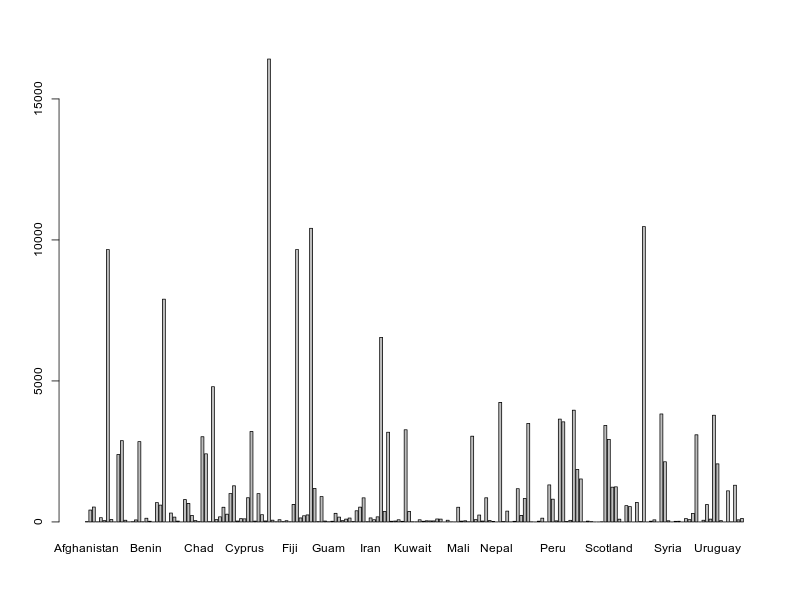

In [71]:
players |> with(nationality_name) |> table() |> barplot()

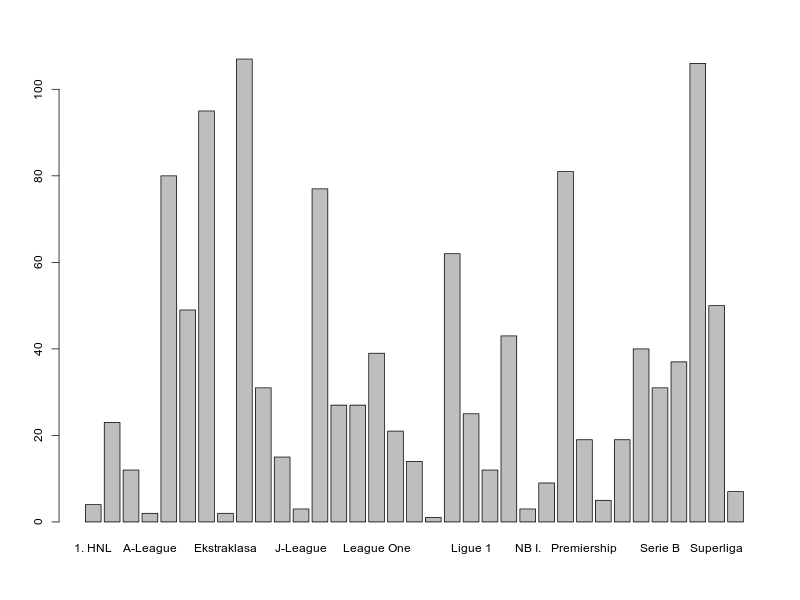

In [74]:
players |> 
  filter(nationality_name == 'Nigeria') |> 
  select(league_name) |> 
  table() |> 
  barplot()

In [82]:
list(name = c('Dan', 'Man', 'San'), age = c(20, 30, 40)) |> as.data.frame() |> tibble()

# A tibble: 3 × 2
  name    age
  <chr> <dbl>
1 Dan      20
2 Man      30
3 San      40

In [83]:
dbGetQuery(conn, "SELECT * FROM 'data/male_players.csv' LIMIT 10") |> tibble()

# A tibble: 10 × 109
   player_id player_url    fifa_version fifa_update update_as_of short_name long_name player_positions overall potential
       <dbl> <chr>                <dbl>       <dbl> <date>       <chr>      <chr>     <chr>              <dbl>     <dbl>
 1    231747 /player/2317…           24           2 2023-09-22   K. Mbappé  Kylian M… ST, LW                91        94
 2    239085 /player/2390…           24           2 2023-09-22   E. Haaland Erling B… ST                    91        94
 3    192985 /player/1929…           24           2 2023-09-22   K. De Bru… Kevin De… CM, CAM               91        91
 4    158023 /player/1580…           24           2 2023-09-22   L. Messi   Lionel A… CF, CAM               90        90
 5    165153 /player/1651…           24           2 2023-09-22   K. Benzema Karim Be… CF, ST                90        90
 6    188545 /player/1885…           24           2 2023-09-22   R. Lewand… Robert L… ST                    90        90
 7    19211

In [ ]:
# Aggregation
# Group By
# Pivot Longer and wider
